#FICO Analytic Challenge Week 4


##Feature Generation Concepts

This week students will continue to learn about feature engineering as a key component of building predictive models for fraud analytics. We will learn to create variables that incorporate the historical activity of a given credit card account holder. Students will gain an appreciation of how a feature may be a good indicator of fraud or non-fraud activity based on how overlapping the respective distributions are. We briefly introduce the concept of correlation.   

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
path = '/content/drive/MyDrive/FICO Analytic Challenge/'
sys.path.append(path +'Data')
sys.path.append(path +'Week 04')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive


In [ ]:
# Location of the data
data = 'Data'

# Location to save model
# model_folder = 'Model'

# Names of the datasets
train_dataset_name = "train.csv"
test_dataset_name = "test_A.csv"
# test_dataset_name = "test_B.csv"
# test_dataset_name = "test_C_notags.csv"

trainSaveName="train_features.csv"
testSaveName="test_A_features.csv"
# testSaveName="test_B_features.csv"
# testSaveName="test_C_notags_features.csv"

In [ ]:
#Upload pre-processed data
# df1 = pd.read_csv("/content/drive/MyDrive/FICO Analytic Challenge/Data/train.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/FICO Analytic Challenge/Data/test_A.csv")
df1=pd.read_csv(os.path.join(path, data, train_dataset_name))
df2=pd.read_csv(os.path.join(path, data, test_dataset_name))

#Distinguish between train and test sets for future notebooks
df1['is_train'] = 1
df2['is_train'] = 0

#Combine dataframes to be processed together
df = pd.concat([df1,df2])

#Sometimes it's convenient to create an array of the base variables before we start defining features
base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry',
       'cardholderState', 'transactionDateTime', 'gender', 'street', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
         'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

In [ ]:
# #Distinguish between train and test sets for future notebooks ONLY FOR TEST_C_NOTAGS
# df=pd.read_csv(os.path.join(path, data, test_dataset_name))
# df['is_train'] = 0

# #Sometimes it's convenient to create an array of the base variables before we start defining features ONLY FOR TEST_C_NOTAGS
# base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
#              'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime', 'gender',
#              'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
#              'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

In [ ]:
#It often helps to decompose the datetime into more useful fields
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime']).astype('datetime64[ns]')
df['datetime'] =  pd.to_datetime(df['transactionDateTime'])
df['transactionHour'] = df['datetime'].dt.hour

#Since many of our features will be calculated at the account level, let's sort our features accordingly
df = df.sort_values(by=['pan', 'transactionDateTime'])

#When reordering data, it's customary to reset the index to align with the order of the rows
df.reset_index(drop=True, inplace=True)

# Handling Non-Numeric Values

- In transaction data, many features are categorical, such as the type of transaction (cash, online purchase, etc.), the country of the merchant, or the type of merchant itself. <font
color
='red'>Machine learning algorithms require numerical input</font>, so we need to convert these categorical features into numerical values. A common method to achieve this is Label Encoding.

- **Label Encoding** is useful when the categorical variable has only two possible values. It assigns 0 and 1 to the two categories. You have seen this, for example, in the binary variables we defined in week 3. Some examples of these are is_cnp and IS_0_TO_5AM

## Let's again take a look at what fields we have available to generate our features from

In [ ]:
df.columns

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'mdlIsFraudTrx',
       'mdlIsFraudAcct', 'transactionDateTime', 'is_train', 'merchCountry',
       'merchState', 'cardholderCountry', 'cardholderState', 'datetime',
       'transactionHour'],
      dtype='object')

Using variables such as name, gender, or even city in a neural network model can lead to ethical violations primarily due to privacy concerns and potential biases. Personal identifiers like 'first' and 'last' names can compromise the anonymity of individuals, leading to privacy breaches. Variables like 'gender', 'city', 'state', and 'zip' can introduce biases, as they may be correlated with sensitive demographic information, potentially resulting in unfair or discriminatory outcomes. For instance, gender bias might lead to unequal treatment or opportunities based on sex. Geographical data such as 'street', 'city', 'state', and 'zip' codes can also perpetuate socio-economic biases and contribute to systemic inequalities. Additionally, using 'job' and 'dob' (date of birth) can further exacerbate age and employment discrimination. Therefore, it is crucial to carefully consider the ethical implications and ensure proper data anonymization and fairness in model training.

In [ ]:
#Let's remove some of these variables to be consistent with our ethical obligations:
#bad_vars = ['first', 'last', 'gender', 'street', 'zip', 'city_pop', 'job', 'dob']
#df.drop(columns=bad_vars,inplace=True)

#Sometimes it's convenient to create an array of the base variables before we start defining features
base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last', 'mdlIsFraudTrx',
             'mdlIsFraudAcct', 'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime',
             'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
             'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

#Sometimes it's convenient to create an array of the base variables before we start defining features ONLY FOR TEST_C_NOTAGS
# base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
#              'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime', 'gender',
#              'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
#              'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

## We can define some more binary features based on these which may or may not be indicative of fraud

In [ ]:
#Calculate some basic binary variables

#Fraudsters want to get as much money as fast as possible. Having a high value variable might catch some of the more greedy criminals
df['IsHighValue'] = (df['transactionAmount'] > 100.).astype(int)

#Transactions occurring in a country different from the customer's home country can indicate potential fraud, especially if the customer rarely travels.
df['is_international'] = (df['merchCountry'] != df['cardholderCountry']).astype(int)

#Fraud is most easily committed anonymously and discreetly; by conducting the crime over the internet, the chances of being caught are much lower.
df['is_cnp'] =  (df['category'].apply(lambda x: x[-3:] == 'net')).astype(int)

#Similarly, security and awareness are at their lowest at off hours. Fraudsters frequently exploit this weakness.
df['IS_0_TO_5AM'] = (df['transactionHour'].astype(int) < 5).astype(int)

In [ ]:
# Calculate the average and median transaction amount
avg_transaction_amount = df['transactionAmount'].mean()
median_transaction_amount = df['transactionAmount'].median()

# Create the 'IsTransaction' feature based on the transaction amount and category
df['IsTransaction'] = ((df['transactionAmount'] > avg_transaction_amount) | (df['transactionAmount'] > median_transaction_amount)).astype(int)

In [ ]:
# Group by 'pan' and 'trans_num' and get the minimum 'datetime' for each group
df['IsSpent'] = df.groupby(['pan', 'trans_num'])['datetime'].transform('min') == df['datetime']
df['IsSpent'] = df['IsSpent'].astype(int)

In [ ]:
# prompt: Using 'is_cnp' and 'IsHighValue' to create a new feature called 'CNP_High'. Make the new feature 'CNP_High' display a binary value. Make it state that If 'is_cnp' ==1 and 'IsHighValue' ==1 then display a 1. If 'is_cnp' ==0 and 'IsHighValue' ==0 then display a 0. If 'is_cnp' ==1 or 'IsHighValue' ==0 display a 0. if 'is_cnp' ==0 or 'IsHighValue' ==1 display a 0

# Create the 'CNP_High' feature
df['CNP_High'] = ((df['is_cnp'] == 1) & (df['IsHighValue'] == 1)).astype(int)

In [ ]:
# prompt: create a feature named 'Is_High_Low' by using the min and max value of each 'category' and 'transactionAmount' and make it a binary vaule

# Group by 'category' and find the min and max transaction amounts for each category
category_transaction_stats = df.groupby('category')['transactionAmount'].agg(['min', 'max'])

# Function to create the 'Is_High_Low' feature
def assign_high_low(row):
  category = row['category']
  transaction_amount = row['transactionAmount']
  if category in category_transaction_stats.index:
    min_amount = category_transaction_stats.loc[category, 'min']
    max_amount = category_transaction_stats.loc[category, 'max']
    if transaction_amount == max_amount:
      return 1
    elif transaction_amount == min_amount:
      return 0
    else:
      return -1 # Or any other value you prefer for transactions not at the extremes
  else:
    return -1  # Handle categories not found in the stats

# Apply the function to create the 'Is_High_Low' feature
df['Is_High_Low'] = df.apply(assign_high_low, axis=1)

In [ ]:
#Check to see if these features have been properly added to our dataframe
df.columns

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'mdlIsFraudTrx',
       'mdlIsFraudAcct', 'transactionDateTime', 'is_train', 'merchCountry',
       'merchState', 'cardholderCountry', 'cardholderState', 'datetime',
       'transactionHour', 'IsHighValue', 'is_international', 'is_cnp',
       'IS_0_TO_5AM', 'IsTransaction', 'IsSpent', 'CNP_High', 'Is_High_Low'],
      dtype='object')

In [ ]:
#Define an array of our features so far
binary_vars = ['IsTransaction','IsSpent', 'is_cnp', 'Is_High_Low', 'CNP_High']

The same thing can be accomplished by observing that our new features are simply the set of the new dataframe's variables without the base data's columns


In [ ]:
# binary_vars = list(set(df.columns) - set(base_cols))

## Check the fraud rate for each of these variables for 0 and 1 values

In [ ]:
#We can loop over our features and compare the fraud rate for when each of these conditions are met
for var in binary_vars:
    is_condition = df[df[var] == 1]['mdlIsFraudAcct'].value_counts(normalize=True)
    not_condition = df[df[var] == 0]['mdlIsFraudAcct'].value_counts(normalize=True)
    print(f'{var} has proportionally',(is_condition[1]/not_condition[1]-1)*100, '% more fraud')


IsTransaction has proportionally -3.325440935252544 % more fraud
IsSpent has proportionally 3848.0113798131733 % more fraud
is_cnp has proportionally 1.5933846621943637 % more fraud
Is_High_Low has proportionally -45.299145299145295 % more fraud
CNP_High has proportionally -1.7192389847637823 % more fraud


In [ ]:
binary_vars

['IsTransaction', 'IsSpent', 'is_cnp', 'Is_High_Low', 'CNP_High']

In [ ]:
#We can loop over our features and compare the fraud rate for when each of these conditions are met
for var in binary_vars:
    is_condition = df[df[var] == 1]['mdlIsFraudAcct'].value_counts(normalize=True)
    not_condition = df[df[var] == 0]['mdlIsFraudAcct'].value_counts(normalize=True)
    # Check if keys 1 and 0 exist before accessing them
    if 1 in is_condition.index and 1 in not_condition.index:
        print(f'{var} has proportionally', (is_condition[1] / not_condition[1] - 1) * 100, '% more fraud')
    else:
        print(f"Warning: Key '1' not found in is_condition or not_condition for variable: {var}")

IsTransaction has proportionally -3.325440935252544 % more fraud
IsSpent has proportionally 3848.0113798131733 % more fraud
is_cnp has proportionally 1.5933846621943637 % more fraud
Is_High_Low has proportionally -45.299145299145295 % more fraud
CNP_High has proportionally -1.7192389847637823 % more fraud


In [ ]:
#Let's try and be more in-line with the data as was seen in week 3:
df['is_late_night'] = ((df['transactionHour'].astype(int) < 4) | (df['transactionHour'].astype(int) > 21)).astype(int)

In [ ]:
binary_vars = ['IsTransaction','IsSpent', 'is_cnp', 'Is_High_Low','is_late_night', 'CNP_High']

In [ ]:
#We can again loop over our features and compare the fraud rate for when each of these conditions are met
for var in binary_vars:
    is_condition = df[df[var] == 1]['mdlIsFraudAcct'].value_counts(normalize=True)
    not_condition = df[df[var] == 0]['mdlIsFraudAcct'].value_counts(normalize=True)
    print(f'{var} has proportionally',(is_condition[1]/not_condition[1]-1)*100, '% more fraud')


IsTransaction has proportionally -3.325440935252544 % more fraud
IsSpent has proportionally 3848.0113798131733 % more fraud
is_cnp has proportionally 1.5933846621943637 % more fraud
Is_High_Low has proportionally -45.299145299145295 % more fraud
is_late_night has proportionally 37.270305501727854 % more fraud


In [ ]:
#We can again loop over our features and compare the fraud rate for when each of these conditions are met
for var in binary_vars:
    is_condition = df[df[var] == 1]['mdlIsFraudAcct'].value_counts(normalize=True)
    not_condition = df[df[var] == 0]['mdlIsFraudAcct'].value_counts(normalize=True)
    # Check if the key '1' exists in both Series
    if 1 in is_condition.index and 1 in not_condition.index:
        print(f'{var} has proportionally',(is_condition[1]/not_condition[1]-1)*100, '% more fraud')
    else:
        print(f"Insufficient data for calculating fraud proportion for {var}")

IsTransaction has proportionally -3.325440935252544 % more fraud
IsSpent has proportionally 3848.0113798131733 % more fraud
is_cnp has proportionally 1.5933846621943637 % more fraud
Is_High_Low has proportionally -45.299145299145295 % more fraud
is_late_night has proportionally 37.270305501727854 % more fraud


### From this, we can see that all of these besides is_cnp might be good variables to use in our feature selections! We also may note that IS_0_TO_5AM and is_late_night variables both perform well, but since they contain very similar information, their correlation may lead to overemphasis on this information. We will talk about the pitfalls of correlated variables in week 5.

## Going beyond Label Encoding, we can start defining customer-specific features

###An important consideration for feature engineering is causality. I.e. we must restrict ourselves to only the past and present when calculating a feature for the current transaction. For instance, instead of taking the mean of our entire dataset, we are only allowed to take the mean of all transactions occurring prior to our current transaction. This is achieved using either the `expanding` or `rolling` functions.

In [ ]:
# PAN behavior anomalies
#For this next line: the combination of expanding() and shift() take only the data prior to our current transaction
df['user_avg_amount'] = df.groupby('pan')['transactionAmount'].expanding().mean().shift().reset_index(level=0, drop=True)

##Let's break this down piece-by-piece
**df.groupby('pan'):** Groups the DataFrame by the 'pan' column. Each unique pan will form a separate group.

**['transactionAmount']**:
Selects the 'transactionAmount' column within each group for further operations.

**.expanding()**: Creates an expanding window, starting from the first transaction and expanding to include all transactions up to the current one for each pan.

**.mean()**: Calculates the mean of all transactions seen so far within the expanding window for each group.

**.shift()**: Shifts the result by one row for each customer, meaning the current row will have the mean of all prior transactions (not including the current one).

**.reset_index(level=0, drop=True)** Resets the index after the groupby operation, removing the 'pan' as an index and flattening the DataFrame. 'drop=True' ensures the 'pan' is not added back as a column.

In [ ]:
#By comparing a user's current transaction to their normal spending activity, we may detect user-specific anomalies
df['RelativeAmount'] = df['transactionAmount'] / df['user_avg_amount']

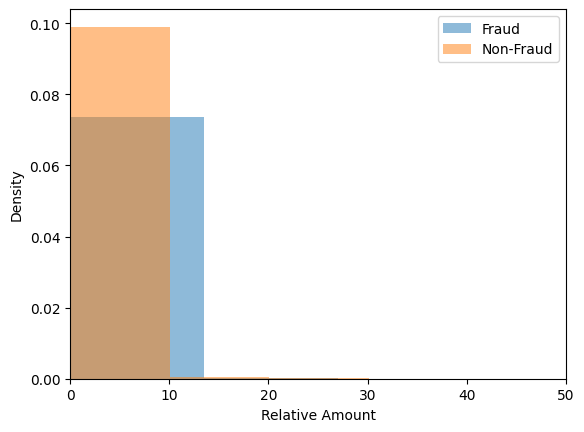

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot histograms
# plt.hist(df[(df['mdlIsFraudAcct'] == 1) & (df['RelativeAmount'] > 0.)]['RelativeAmount'], bins=50, density=True, alpha=0.5, label='Fraud')
# plt.hist(df[(df['mdlIsFraudAcct'] == 0) & (df['RelativeAmount'] > 0.)]['RelativeAmount'], bins=50, density=True, alpha=0.5, label='Non-Fraud')

# # Add labels and legend
# plt.xlabel('Relative Amount')
# plt.ylabel('Density')
# plt.xlim([0,50])
# #plt.title('Normalized Histograms')
# plt.legend()

# # Show plot
# plt.show()


## From this plot, it seems the two distributions are somewhat overlapping, but there is a sharp drop after RelativeAmount > 10. This might make a good binary variable. Think about how you might implement this into your model. For now, let's explore other options.

# Generating New Variables

- Creating new features from existing data can help uncover patterns and improve the performance of machine learning models. Read more on the process of feature engineering in the following links: https://builtin.com/articles/feature-engineering up to "Best Feature Engineering Tools to Know section." https://www.featureform.com/post/feature-engineering-guide up to "The Lifecycle of a Machine Learning Project section." Here, we will generate new features that provide additional insights into the transaction behavior:



# Let's pause to reflect on our initial fields and the new features we've created

In [ ]:
df.keys()

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'mdlIsFraudTrx',
       'mdlIsFraudAcct', 'transactionDateTime', 'is_train', 'merchCountry',
       'merchState', 'cardholderCountry', 'cardholderState', 'datetime',
       'transactionHour', 'IsHighValue', 'is_international', 'is_cnp',
       'IS_0_TO_5AM', 'IsTransaction', 'IsSpent', 'CNP_High', 'Is_High_Low',
       'is_late_night', 'user_avg_amount', 'RelativeAmount'],
      dtype='object')

Though we are limited with our available fields, there are still ways to squeeze useful features from an ostensibly incomplete dataset. Sometimes signal can be lost in the noise of non-fraud fluctuations. A good way to suppress this noise is by implementing a rolling windows average. In the example below, we see a very noise curve (blue), but with a rolling average, we can more easily ascertain the true nature of the pattern: a simple sin curve (red).
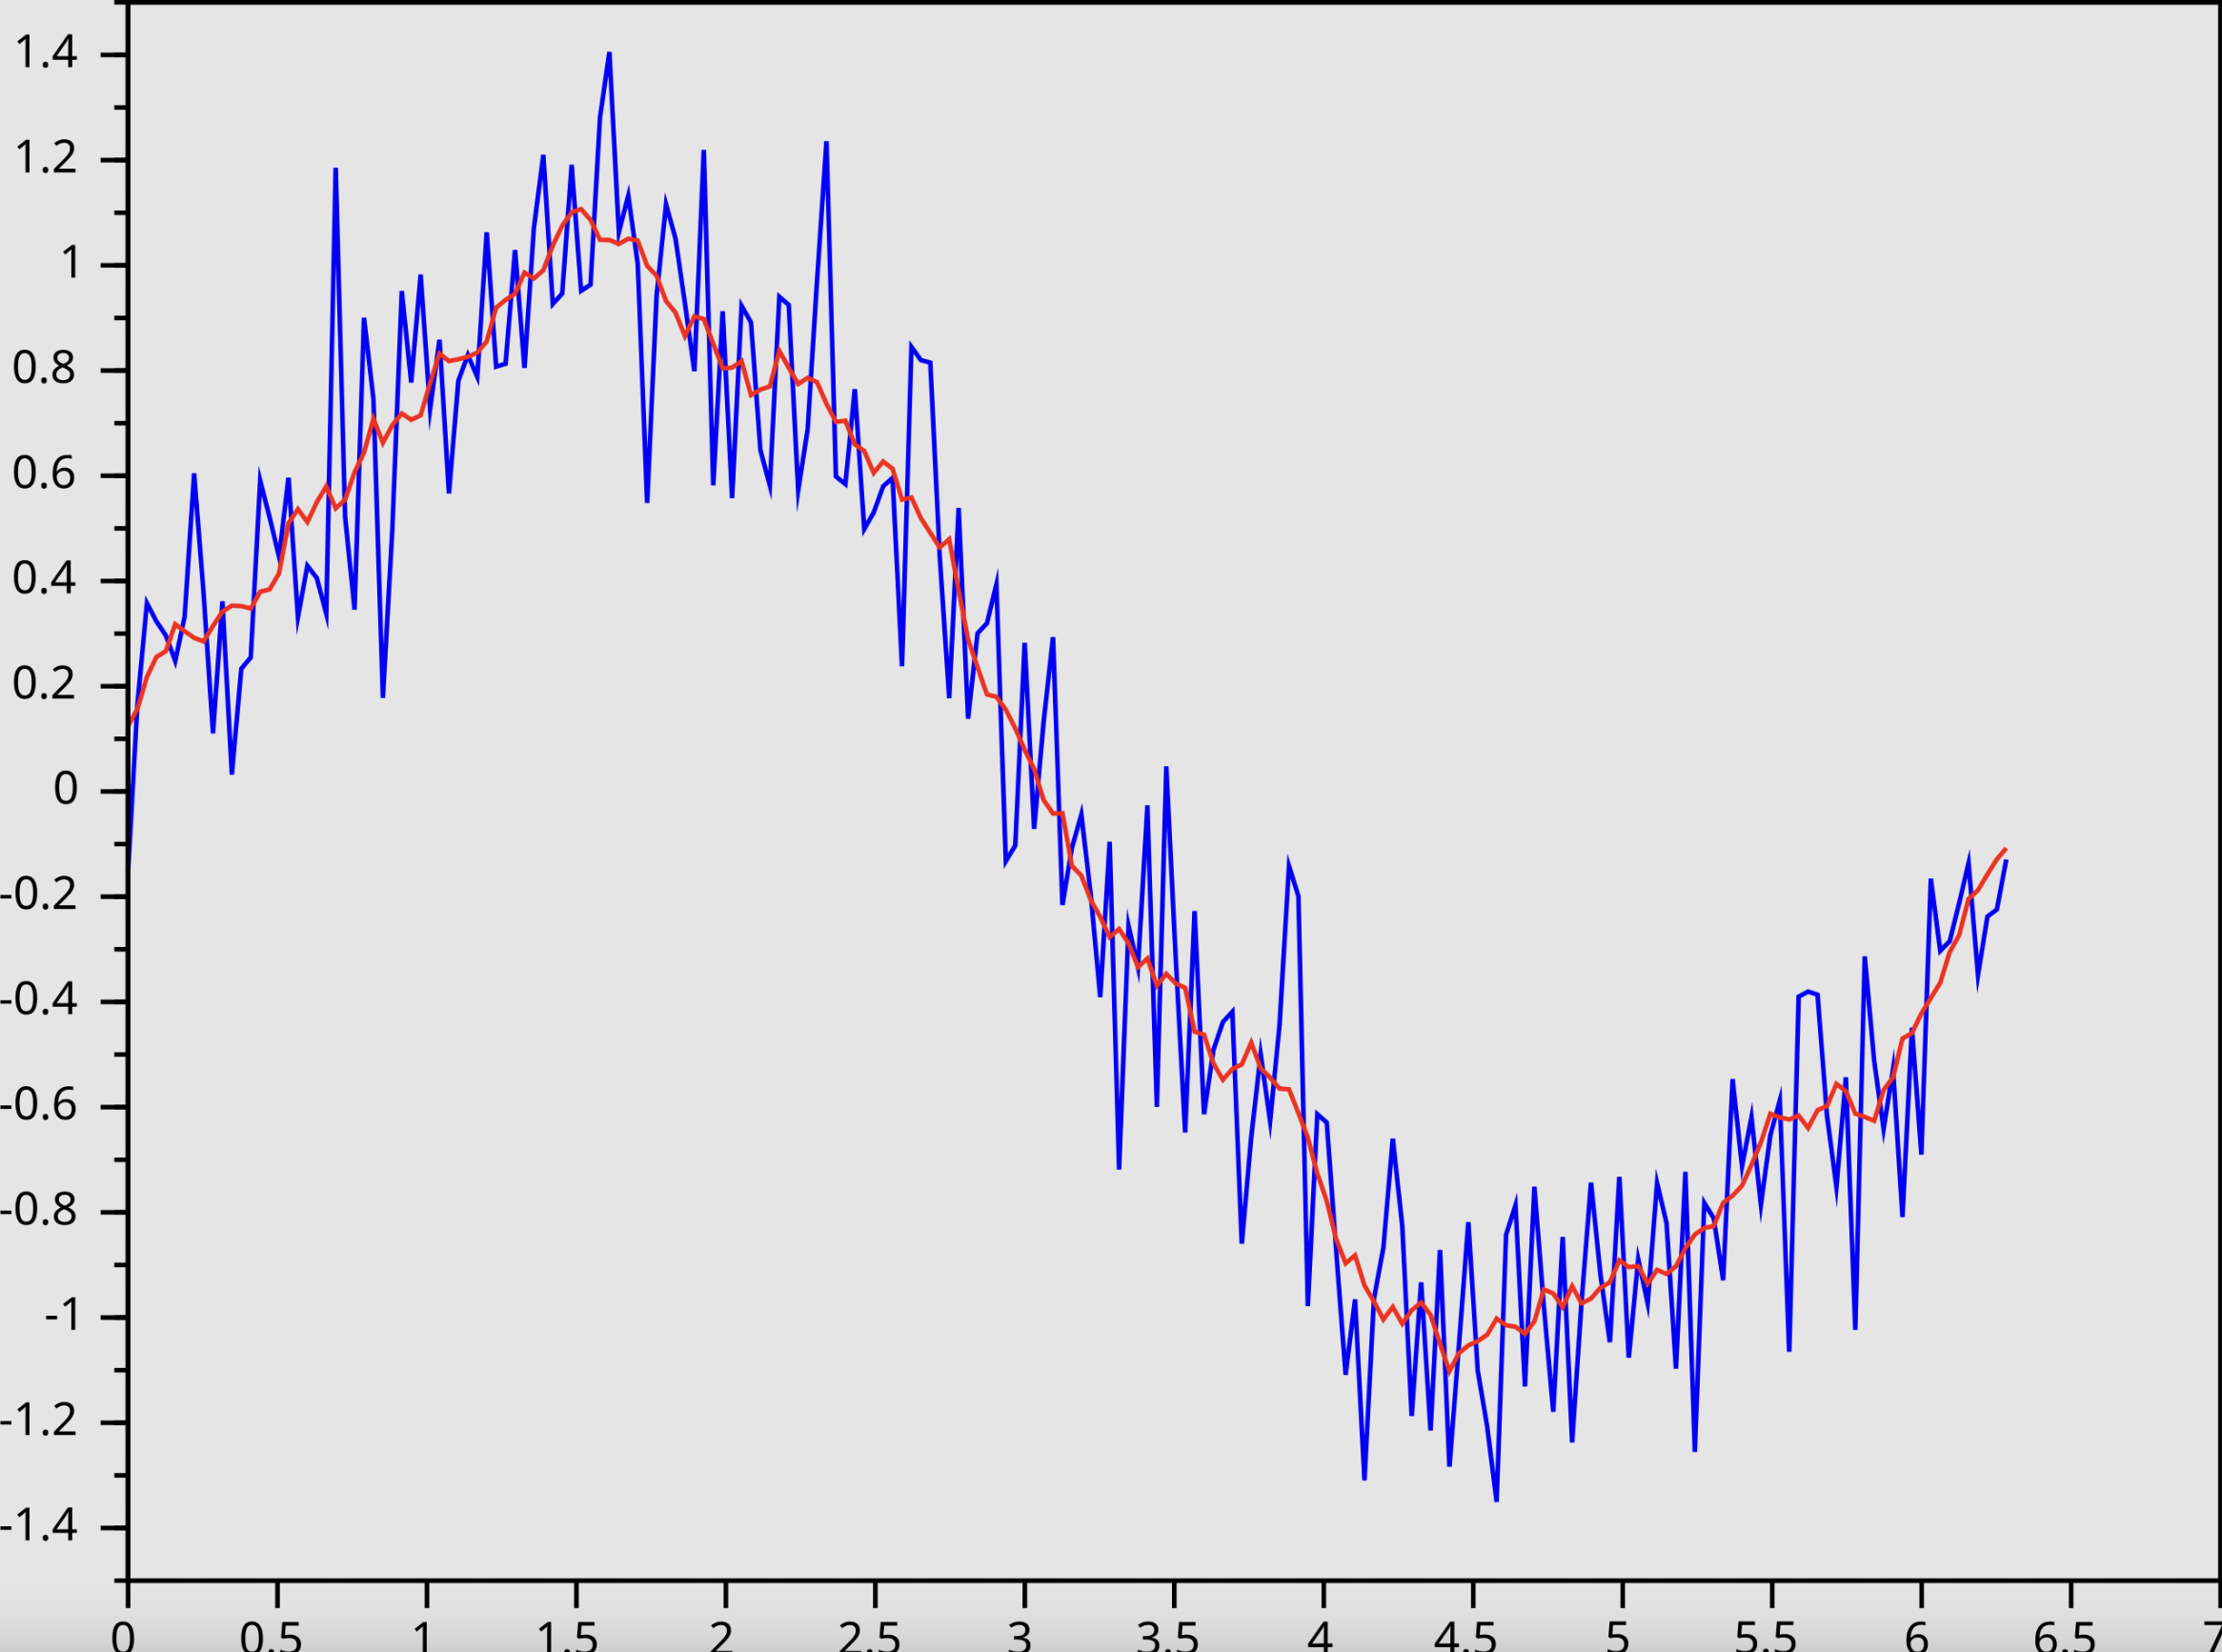

In [ ]:
#Very short intervals between transactions can be suspicious, especially if they are unusual for the customer.
df['deltaTime'] = df.groupby('pan')['datetime'].transform(lambda x: x.diff().dt.total_seconds()) #Time in seconds between the current and last transactions

#This rolling average helps to understand the trend in transaction amounts. Sudden changes in trend might be indicative of fraud.
df['amt_trend_5e'] = df.groupby('pan')['transactionAmount'].transform(lambda x: x.rolling(window=5).mean())

#Instead of taking the trend over a number of events, we can also specify a period over which we're interested
df.set_index('datetime', inplace=True)

#Looking at the average of the last day's transactions may reveal a large average transaction trend
df['amt_trend_24h'] = df.groupby('pan')['transactionAmount'].transform(lambda x: x.rolling(window='24h').mean())

# Looking at the number volume of transactions can often also be an indicator of
# fraud. The perpetrators want to commit as muhc fraud as fast as possible
df['count_trend_1h'] = df.groupby('pan')['transactionAmount'].transform(lambda x: x.rolling(window='1h').count())


df = df.fillna(0)
df.reset_index(drop=True, inplace=True)
df['datetime'] =  pd.to_datetime(df['transactionDateTime'])

#Often times, fraudsters will purchase or withdraw the same item or amount in succession
df['repeat_amt'] = (df['transactionAmount'] == df.groupby('pan')['transactionAmount'].shift(1)).astype(int)


The t-statistic (or t-stat) is a value derived from a statistical hypothesis test. It is used to determine if there is a significant difference between the means of two groups, or to test other statistical hypotheses about the parameters of a population. The t-statistic is calculated using the sample data and compares the sample mean to the population mean, adjusted for the sample size and variability.



In [ ]:
# import seaborn as sns
# from scipy.stats import ttest_ind

# # Generate descriptive statistics for fraud and non-fraud transactions
# fraud = df[df['mdlIsFraudTrx'] == 1]
# non_fraud = df[df['mdlIsFraudTrx'] == 0]

# # Statistical tests and visualizations
# features = list(set(df.columns) - set(base_cols))

# for feature in features:
#     # T-test
#     t_stat, p_val = ttest_ind(fraud[feature].dropna(), non_fraud[feature].dropna(), equal_var=False)
#     print(f'Feature: {feature}, t-statistic: {t_stat}, p-value: {p_val}')

#     # Histogram
#     if len(df[feature].unique()) > 2:
#       kde = True
#     else:
#       kde = False
#     plt.figure(figsize=(10, 6))
#     sns.histplot(fraud[feature], color='red', label='Fraud', kde=kde, stat="density", linewidth=0)
#     sns.histplot(non_fraud[feature], color='blue', label='Non-Fraud', kde=kde, stat="density", linewidth=0)
#     plt.title(f'Histogram of {feature} for Fraudulent and Non-Fraudulent Transactions')
#     plt.legend()
#     plt.show()


# In addition to the time-based average and event-based average, we can create features such as:
- **Transaction Amount Difference:** Difference between the current and previous transaction amounts.
- **Transaction Frequency:** Number of transactions within a specific period.
- **Transaction Ratio:** Ratio of a specific type of transaction (e.g., online) to the total number of transactions.

- Try defining the above definitions and attaching columns to your dataframe in a similar way to the functions above

###Sometimes when we have a surplus of variables, or don't want the model to run for extended periods of time, we will curate our variable list to something more manageable given our resources. Later, we will use performance metrics and sensitivity to understand which variables are the best, but for now, we can look at which variables are highly correlated and may be redundant with each other

In [ ]:
# JF = df[features]
# correlation_matrix = JF.corr(method='pearson')

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# plt.title('Correlation Matrix')
# plt.show()

This plot shows how correlated our features are with other features in our dataframe. Higher numbers mean higher correlation. The diagonal of our correlation matrix is filled with ones since a feature is exactly correlated with itself by definition. When some variables are too correlated with each other, we usually remove the less impactful feature. Here, you can see that our IS_0_TO_5AM and is_late_night variables are somewhat correlated.

## Now that we have a dataframe with some potentially useful features, let's save it to be used in future sessions.

In [ ]:
# df['amount_diff'] = #TODO
# df['num_last_24_hours'] = #TODO
# df['num_hi_amt_last_hour'] = #TODO
# df['category_ratio'] = #TODO

##Generate 3 other variables to be used in your neural net and logreg models

In [ ]:
# Features to save
if "datetime" in df.columns:
  features = list(set(df.columns) - set(base_cols + ["datetime"]))
else:
  features = list(set(df.columns) - set(base_cols))

features.sort()
saveFeatures = [*base_cols, *features]
print(f"Features to save: {saveFeatures}")

In [ ]:
df[df['is_train'] == 1][saveFeatures].to_csv(f'/content/drive/MyDrive/FICO Analytic Challenge/Data/{trainSaveName}',index=False)
df[df['is_train'] == 0][saveFeatures].to_csv(f'/content/drive/MyDrive/FICO Analytic Challenge/Data/{testSaveName}',index=False)

In [ ]:
# df[df['is_train'] == 1].to_csv(f'/content/drive/MyDrive/data/FICO Analytic Challenge/Data/train_features.csv',index=False)
# df[df['is_train'] == 0].to_csv(f'/content/drive/MyDrive/FICO Analytic Challenge/Data/test_C_notags_features.csv',index=False)